# WeatherPy


# Analysis

##### Note*: Coordinates are randomly generted from a 2,000 random number pool so the result will be different everytime after re-running the codes
 
## Observed Trend 1:
Based on the data given, the closer to the equator, the higher the temperature

## Observed Trend 2:
Based on the data given, there was no corelation between Humidity and Latitude

## Observed Trend 3:
The windspeed for most cities fall under 20mph and there seems to be no corelation between wind speed and Latitude


In [30]:
# Import dedendencies
import pandas as pd
import requests as req
from citipy import citipy 
import matplotlib.pyplot as plt
import random
import seaborn as sns
import time as time
from config import api_key

In [31]:
# Create list of random latitudes and longitudes
df= pd.DataFrame(columns =['Lat',"Lng","City","Temperature","Humidity","Clouds","Wind Speed"])

# Create list to hold values
lat = []
lng = []

# Loop through 0-2000 for city count 
for x in range(0,2000):
    
    # Adding random number for lat list in (-90 to 90) and for lng list in (-180 to 180)
    lat.append(random.uniform(-90,90))
    lng.append(random.uniform(-180,180))

# Adding lat and lng value to dataframe
df['Lat'] = lat
df['Lng'] = lng

df.head()

,Lat,Lng,City,Temperature,Humidity,Clouds,Wind Speed
0,-64.370348,-96.302847,NaN,NaN,NaN,NaN,NaN
1,77.929011,46.404740,NaN,NaN,NaN,NaN,NaN
2,1.381099,28.391806,NaN,NaN,NaN,NaN,NaN
3,25.579901,-38.730524,NaN,NaN,NaN,NaN,NaN
4,-64.724747,-141.375550,NaN,NaN,NaN,NaN,NaN


# Generate City List

In [32]:
# Create list to hold values
cities = []

# Iterate over DataFrame rows as (index, Series) pairs
for index, row in df.iterrows():
    city = citipy.nearest_city(row["Lat"],row["Lng"])

    # Adding values to cities list
    cities.append(city.city_name)

# Adding city value to dataframe
df['City'] = cities

df.head()

,Lat,Lng,City,Temperature,Humidity,Clouds,Wind Speed
0,-64.370348,-96.302847,punta arenas,NaN,NaN,NaN,NaN
1,77.929011,46.404740,belushya guba,NaN,NaN,NaN,NaN
2,1.381099,28.391806,wamba,NaN,NaN,NaN,NaN
3,25.579901,-38.730524,ponta do sol,NaN,NaN,NaN,NaN
4,-64.724747,-141.375550,rikitea,NaN,NaN,NaN,NaN


In [33]:
# Remove duplicates and make sure there are atleast 500 unique cities to test
df = df.drop_duplicates("City",keep="first")
len(df)

762

In [34]:
# Test to see if API was retrieved
# Setting base URL, city value and unit
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "margate"
units = "imperial"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={api_key}&q={city}&units={units}"

# Get weather data
weather_response = req.get(query_url)
weather_json = weather_response.json()
weather_json

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -43.03, 'lon': 147.26},
 'dt': 1521178200,
 'id': 2158744,
 'main': {'humidity': 52,
  'pressure': 1015,
  'temp': 64.4,
  'temp_max': 64.4,
  'temp_min': 64.4},
 'name': 'Margate',
 'sys': {'country': 'AU',
  'id': 8195,
  'message': 0.0037,
  'sunrise': 1521144502,
  'sunset': 1521189006,
  'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
   'icon': '04d',
   'id': 803,
   'main': 'Clouds'}],
 'wind': {'deg': 40, 'speed': 16.11}}

# Perform API Calls

In [35]:
count = 0

# Create list to hold values
temp=[]
humidity =[]
clouds = []
wind_speed = []


for index,row in df.iterrows():
    count+= 1
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + row['City']
    print("City number "+str(count))
    print(f"City Name: "+row["City"])
    print(query_url)   
    
    try:
        info = req.get(query_url).json()
        temp.append(info['main']['temp'])
        humidity.append(info['main']['humidity'])
        clouds.append(info['clouds']['all'])
        wind_speed.append(info['wind']['speed'])
    
    except:
        temp.append(0)
        humidity.append(0)
        clouds.append(0)
        wind_speed.append(0)



print("-"*100)
print("                Data Retrieval Complete")
print("-"*100)

City number 1
City Name: punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=punta arenas
City number 2
City Name: belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=belushya guba
City number 3
City Name: wamba
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=wamba
City number 4
City Name: ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=ponta do sol
City number 5
City Name: rikitea
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=rikitea
City number 6
City Name: kahului
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=kahului
City number 7
City Name: berlevag
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d

City number 57
City Name: puerto escondido
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=puerto escondido
City number 58
City Name: cape town
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=cape town
City number 59
City Name: bluff
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=bluff
City number 60
City Name: atuona
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=atuona
City number 61
City Name: bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=bathsheba
City number 62
City Name: bud
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=bud
City number 63
City Name: auki
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&u

City number 112
City Name: aksu
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=aksu
City number 113
City Name: fairbanks
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=fairbanks
City number 114
City Name: nyzhnya krynka
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=nyzhnya krynka
City number 115
City Name: tiksi
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=tiksi
City number 116
City Name: chongwe
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=chongwe
City number 117
City Name: vostok
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=vostok
City number 118
City Name: raudeberg
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf

City number 167
City Name: leh
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=leh
City number 168
City Name: tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=tuktoyaktuk
City number 169
City Name: tecoanapa
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=tecoanapa
City number 170
City Name: lorengau
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=lorengau
City number 171
City Name: thompson
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=thompson
City number 172
City Name: attawapiskat
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=attawapiskat
City number 173
City Name: eureka
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c047

City number 223
City Name: saint-augustin
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=saint-augustin
City number 224
City Name: geraldton
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=geraldton
City number 225
City Name: meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=meulaboh
City number 226
City Name: havelock
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=havelock
City number 227
City Name: armacao dos buzios
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=armacao dos buzios
City number 228
City Name: terney
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=terney
City number 229
City Name: nelson bay
http://api.openweathermap.org/data/2.5/weath

City number 279
City Name: dien bien
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=dien bien
City number 280
City Name: huarmey
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=huarmey
City number 281
City Name: mao
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=mao
City number 282
City Name: ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=ambilobe
City number 283
City Name: dingle
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=dingle
City number 284
City Name: bambanglipuro
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=bambanglipuro
City number 285
City Name: aswan
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68

City number 335
City Name: narsaq
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=narsaq
City number 336
City Name: toliary
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=toliary
City number 337
City Name: sideropolis
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=sideropolis
City number 338
City Name: burnie
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=burnie
City number 339
City Name: banda aceh
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=banda aceh
City number 340
City Name: porto novo
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=porto novo
City number 341
City Name: asau
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d

City number 391
City Name: torrington
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=torrington
City number 392
City Name: cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=cabedelo
City number 393
City Name: kerema
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=kerema
City number 394
City Name: luanda
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=luanda
City number 395
City Name: avera
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=avera
City number 396
City Name: tommot
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=tommot
City number 397
City Name: tibacuy
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units

City number 447
City Name: gornopravdinsk
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=gornopravdinsk
City number 448
City Name: kysyl-syr
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=kysyl-syr
City number 449
City Name: simpang
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=simpang
City number 450
City Name: saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=saint-pierre
City number 451
City Name: chapais
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=chapais
City number 452
City Name: jiexiu
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=jiexiu
City number 453
City Name: chernyshevskiy
http://api.openweathermap.org/data/2.5/weather?appid=2ee

City number 502
City Name: tigil
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=tigil
City number 503
City Name: bargal
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=bargal
City number 504
City Name: matagami
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=matagami
City number 505
City Name: betsiamites
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=betsiamites
City number 506
City Name: hambantota
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=hambantota
City number 507
City Name: chimoio
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=chimoio
City number 508
City Name: te anau
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26f

City number 558
City Name: amahai
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=amahai
City number 559
City Name: boende
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=boende
City number 560
City Name: clarence town
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=clarence town
City number 561
City Name: dzaoudzi
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=dzaoudzi
City number 562
City Name: le moule
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=le moule
City number 563
City Name: yantarnyy
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=yantarnyy
City number 564
City Name: whitehorse
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0

City number 613
City Name: laguna
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=laguna
City number 614
City Name: isiro
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=isiro
City number 615
City Name: salalah
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=salalah
City number 616
City Name: ponta delgada
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=ponta delgada
City number 617
City Name: casselman
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=casselman
City number 618
City Name: guanica
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=guanica
City number 619
City Name: oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d

City number 669
City Name: marang
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=marang
City number 670
City Name: bouloupari
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=bouloupari
City number 671
City Name: kumluca
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=kumluca
City number 672
City Name: lahat
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=lahat
City number 673
City Name: lufilufi
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=lufilufi
City number 674
City Name: maxixe
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=maxixe
City number 675
City Name: sao raimundo das mangabeiras
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69

City number 724
City Name: mattru
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=mattru
City number 725
City Name: okandja
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=okandja
City number 726
City Name: odweyne
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=odweyne
City number 727
City Name: homer
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=homer
City number 728
City Name: ocos
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=ocos
City number 729
City Name: lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68ac&units=imperial&q=lazaro cardenas
City number 730
City Name: maragogi
http://api.openweathermap.org/data/2.5/weather?appid=2ee982bfdaaba69c0474d9d26fdf68a

In [36]:
# Create list to hold values
df["Temperature"] = temp
df["Humidity"] = humidity
df["Clouds"] = clouds
df["Wind Speed"] = wind_speed

df.head()

,Lat,Lng,City,Temperature,Humidity,Clouds,Wind Speed
0,-64.370348,-96.302847,punta arenas,44.60,87,75,5.82
1,77.929011,46.404740,belushya guba,0.00,0,0,0.00
2,1.381099,28.391806,wamba,72.13,90,68,3.00
3,25.579901,-38.730524,ponta do sol,66.91,90,36,2.77
4,-64.724747,-141.375550,rikitea,81.13,98,68,16.87


# Latitude vs Temperature Plot


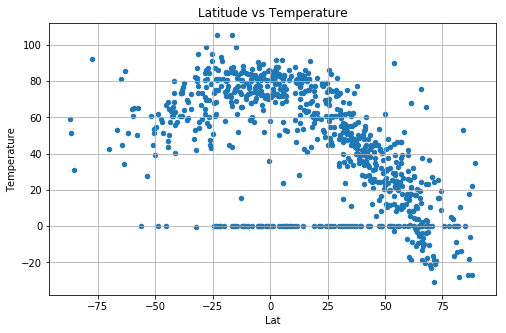

In [37]:
df.plot(kind="scatter", x="Lat", y="Temperature", grid=True, figsize=(8,5),
              title="Latitude vs Temperature")
plt.show()

# Latitude vs Humidity Plot

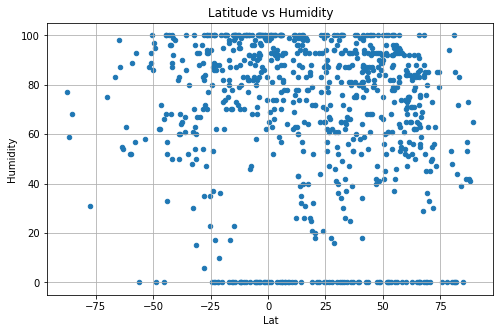

In [38]:
df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,5),
              title="Latitude vs Humidity")
plt.show()

# Latitude vs Cloudness Plot

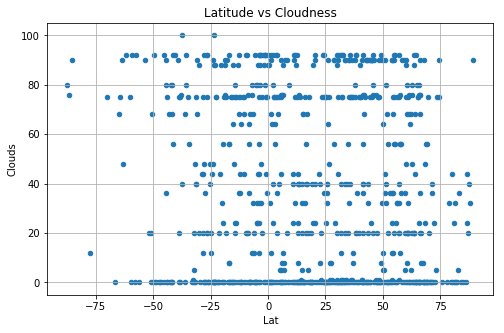

In [39]:
df.plot(kind="scatter", x="Lat", y="Clouds", grid=True, figsize=(8,5),
              title="Latitude vs Cloudness")
plt.show()

# Latitude vs Wind Speed Plot

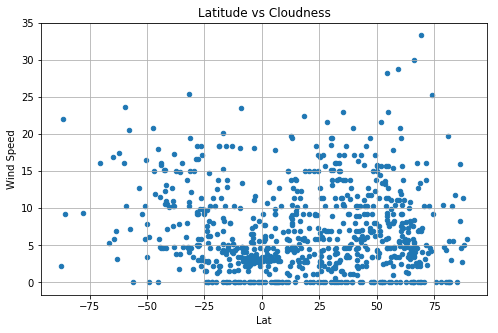

In [40]:
df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,5),
              title="Latitude vs Cloudness")
plt.show()